### Files info:
1. The number of deaths and the death rate associated with the Influenza virus by State in 2015;
2. The average temperature during the winter season from 2015/2016 by State;

### Deliverables:
1. Load both datasets and merge them;
2. Create a function that receives a temperature in Celsius and converts it to Fahrenheit.
3. Create a function that receives a temperature in Fahrenheit and converts it to Celsius. Make both
transformations in the same function, receiving as additional argument the type of conversion you
want to perform.
4. Apply the conversion to your data frame, representing the temperature in Fahrenheit.
5. Calculate the Pearson's correlation coefficient to determine if the number of deaths associated with
influenza and the average temperature are correlated. Do the same thing to the death rate, instead of 


### Sample file size

We need to determine the size of file. Very small sizes.

In [3]:
%cd data/

/Users/azizmamatov/Google_Drive/data


In [6]:
#checks the file size
import os
os.path.getsize('avg_winter_temperature.csv')


440

### Methodology to be used
We will use numpy and pandas to analyze our file. And first we will create dataframes out of csv files and see what table consists of: the df2 is 50 rows X 3 columbs and df1 is 50 rows X 4 columbs

State data is object while other information is numberical.

In [15]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('flu_pneumonia.CSV') #letting panda framing our csv file to a table format
df2 = pd.read_csv('avg_winter_temperature.csv')
print df1.head(2)
print df2.head(2)
print 'number of rows', len(df1), len(df2)
print df1.dtypes, df2.dtypes

  state  death_rate  death_abs
0    AK         8.4         41
1    AL        19.5       1097
  state  avg_celsius
0    AK        -16.3
1    AL          8.1
number of rows 50 50
state          object
death_rate    float64
death_abs       int64
dtype: object state           object
avg_celsius    float64
dtype: object


In [30]:
df1.describe()

,death_rate,death_abs
count,50.000000,50.000000
mean,15.882000,1139.160000
std,3.940149,1196.042357
min,8.400000,41.000000
25%,13.625000,378.250000
50%,15.800000,745.500000
75%,17.850000,1412.500000
max,27.400000,6188.000000


### Importing data visualization frameworks

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#insert data in graph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Merging dataframes

In [29]:
df = pd.merge(df1, df2, on='state')
df.describe()


,death_rate,death_abs,avg_celsius
count,50.000000,50.000000,50.000000
mean,15.882000,1139.160000,0.132000
std,3.940149,1196.042357,6.850099
min,8.400000,41.000000,-16.300000
25%,13.625000,378.250000,-4.525000
50%,15.800000,745.500000,0.000000
75%,17.850000,1412.500000,3.900000
max,27.400000,6188.000000,19.700000


#### Formula to convert temp
Create a function that receives a temperature in Fahrenheit and converts it to Celsius. Make both transformations in the same function, receiving as additional argument the type of conversion you want to perform.

°F to °C	Deduct 32, then multiply by 5, then divide by 9
°C to °F	Multiply by 9, then divide by 5, then add 32

In [38]:
def temp_conv():
    question = 'Celcius'
    reply = str(raw_input(question+' (y/n): ')).lower().strip()
    if reply[0] == 'y':
        C = int(raw_input())
        F = C*9/5+32
        print 'Fahrenheit', F
    elif reply[0] == 'n':
        F = int(raw_input())
        C = (F-32)*5/9
        print 'Celcius', C
        #return Fahrenheit(F)
temp_conv()    
'''
def Celcius(C):
    C = int(raw_input())
    F = C*9/5+32
    return F
def Fahrenheit(F):
    F = int(raw_input())
    C = (F-32)*5/9
    return C
temp_conv()
'''

Celcius (y/n): n
134
Celcius 56


'\ndef Celcius(C):\n    C = int(raw_input())\n    F = C*9/5+32\n    return F\ndef Fahrenheit(F):\n    F = int(raw_input())\n    C = (F-32)*5/9\n    return C\ntemp_conv()\n'

In [42]:
def convert_temp(t, typ):
    if typ == 'F':
        return (t-32)*5/9
    if typ == 'C':
        return t*9/5+32

convert_temp(100,'F')

37

In [46]:
df['avg_fahrenheit'] = np.nan
df.head()
df.avg_fahrenheit = df.avg_celsius*9/5+32
df.head()

,state,death_rate,death_abs,avg_celsius,avg_fahrenheit
0,AK,8.4,41,-16.3,2.66
1,AL,19.5,1097,8.1,46.58
2,AR,20.0,700,5.3,41.54
3,AZ,9.5,775,6.4,43.52
4,CA,14.8,6188,7.9,46.22


In [48]:
np.corrcoef(df.avg_fahrenheit, df.death_rate)[0,1]

0.3043702682829636

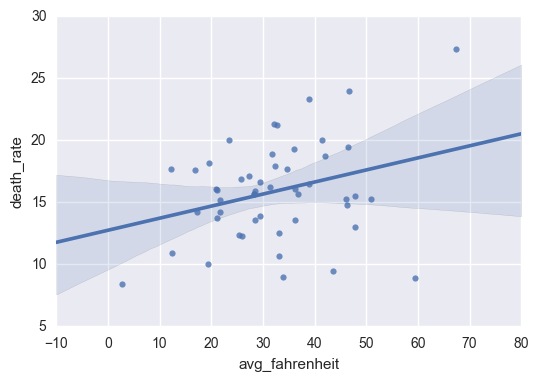

In [49]:
import matplotlib.pylab
import seaborn as sns
sns.regplot(x = 'avg_fahrenheit', y = 'death_rate', data = df)